In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

(426, 572)


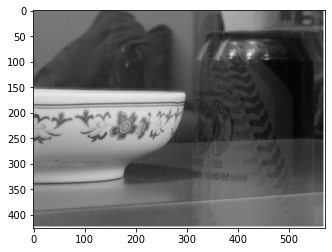

In [10]:
# reading the image required 
img = cv2.imread('./img.png',0)
print(img.shape)
plt.imshow(img, cmap='gray')

38


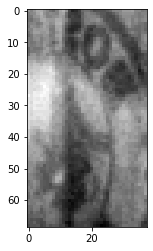

In [12]:
templateBox = [[183,313],[252,351]]
print(templateBox[1][1] - templateBox[0][1])
template = img[templateBox[0][0]: templateBox[1][0], templateBox[0][1]: templateBox[1][1]]
plt.imshow(img[templateBox[0][0]: templateBox[1][0], templateBox[0][1]: templateBox[1][1]], cmap='gray')

In [13]:
mid = np.zeros(2).astype(int)
for i in templateBox:
    for j in range(2):
        mid[j] += i[j]/2

mid = templateBox[0]

69
38


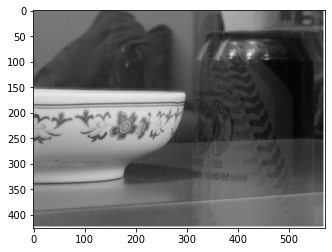

In [14]:
# templateBox = [[354,238],[185, 313]]
print(templateBox[1][0] - templateBox[0][0])
print(templateBox[1][1] - templateBox[0][1])
template = img[templateBox[0][0]: templateBox[1][0], templateBox[0][1]: templateBox[1][1]]
# plt.imshow(img[templateBox[0][0]: templateBox[1][0], templateBox[0][1]: templateBox[1][1]], cmap='gray')
# cv2.rectangle(img,templateBox[0][::-1],templateBox[1][::-1], 255, 1);
plt.imshow(img,cmap='gray')

9580.194


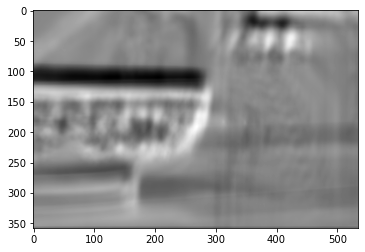

In [15]:
img2 = img.copy()
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
plt.imshow(res,cmap = 'gray')
print(np.median(res))

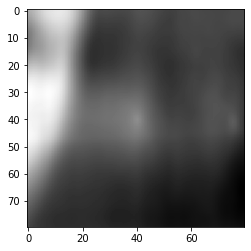

In [16]:
plt.imshow(res[mid[0]-40:mid[0]+40, mid[1]-40:mid[1]+40],cmap= 'gray')

In [17]:
sL = sorted(res[mid[0]-40:mid[0]+40, mid[0]-40:mid[0]+40].flatten())
# print(sL)
a = np.array(np.where(res != 0))
a = a.T
b = [i for i in a if i[0] >= templateBox[0][0] -10 and i[0] <= templateBox[1][0] + 10]
b = [i for i in b if i[1] >= templateBox[0][1] -10 and i[1] <= templateBox[1][1] + 10]


In [20]:
print(len(b))

5310


In [2]:
r = np.zeros_like(res)
for i, j in b:
    r[i, j] = res[i, j]
# plt.imshow(r, cmap= 'gray')

r1 = (r > np.max(r)/3)
plt.imshow(r1,cmap='gray')

NameError: name 'np' is not defined

In [1]:
r2 = r1.copy()
r2[:,:320] = 0
r2[183][313] = 1
plt.imshow(r2,cmap='gray')
print(mid)

NameError: name 'r1' is not defined

In [35]:
plt.imsave('./r.png',r2)
np.sum(r2)
wh = np.array(np.where(r2 == True)).T
shift = np.max([np.abs(wh[0] - wh[i]) for i in range(1, 4)])
shift


35

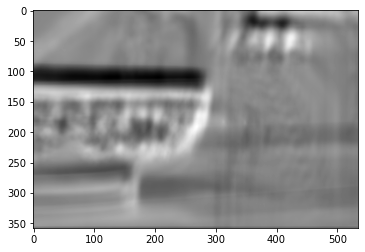

In [24]:
res2 = cv2.matchTemplate(img,template,cv2.TM_CCOEFF)
plt.imshow(res2,cmap = 'gray')
d = [38,0]

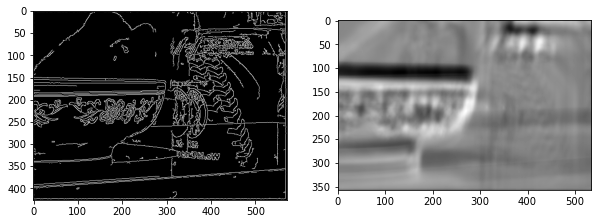

In [25]:
c1 = cv2.Canny(img,20,70)
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(c1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(res, cmap='gray')
fig.set_size_inches(10,10)